In [3]:
library(phyloseq)
library(ggplot2)
library(vegan)
library(readr)
library(data.table)
library(dplyr)
library(stats)
library(plotly)
library(RColorBrewer)
library(ape)
library(nlme)
library(reshape2)

#### Old analyses - non-ultrametric tree

In [30]:
#Read in ultrametric tree, transform matrix to columns, rename columns
brlen.matrix <- read.csv("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/PGLS_analyses/ML_constrained.csv", stringsAsFactors=TRUE)
#brlen.matrix = read.csv("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/Micro_29_6nodes_800M_median_pdist.csv")
brlen.mdf = melt(brlen.matrix)
colnames(brlen.mdf)[1] <- "Host_Pair"
colnames(brlen.mdf)[2] <- "Host_A"
colnames(brlen.mdf)[3] <- "Host_B"
colnames(brlen.mdf)[4] <- "variable"
colnames(brlen.mdf)[5] <- "pdist"
brlen2 = mutate(brlen.mdf, Host_Pair = paste(Host_A, Host_B, sep = '/'))
brlen3 = select(brlen2, Host_Pair, pdist)
write.csv(brlen3, "/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/CSVfiles_for_tests/brlen_nonpar_final.csv")


Using Host_names, HostA, HostB as id variables


In [53]:
brlen_mt = select(brlen2, Host_A, Host_B, pdist)
head(newbrlen)

Host_A,Host_B,pdist
Chaerephon_bivittatus,Chaerephon_bivittatus,0.0000000
Chaerephon_bivittatus,Coleura_afra,0.5357023
Chaerephon_bivittatus,Hipposideros_camerunensis,0.5589793
Chaerephon_bivittatus,Epomophorus_labiatus,0.5349779
Chaerephon_bivittatus,Epomophorus_wahlbergi,0.5322959
Chaerephon_bivittatus,Hipposideros_caffer,0.5378077


In [65]:
library(reshape2)
fecal_wuf = acast(wuf, Host_A~Host_B, value.var="wuf", fun.aggregate=mean)
brlen = acast(brlen_mt, Host_A~Host_B, value.var="pdist")
head(fecal_wuf)
head(brlen)

,Chaerephon_bivitattus,Coleura_afra,Doryrhina_camerunensis,Epomophorus_labiatus,Epomophorus_wahlbergi,Hipposideros_caffer,Hipposideros_ruber,Macronycteris_vittatus,Micropteropus_pusillus,Miniopterus_africanus,...,Pipistrellus_sp,Rhinilophus_landeri,Rhinolophus_clivosus_acrotis,Rhinolophus_eloquens,Rhinolophus_landeri,Rousettus_aegyptiacus,Scotoecus_hindei_albigula,Scotophilus_dinganii,Stenonycteris_lanosus,Triaenops_afer
Chaerephon_bivitattus,0.2447815,0.2743962,0.3317534,0.23000741,0.22344215,0.2497978,0.2658244,0.2957735,0.2287399,0.2585618,...,0.3992118,0.22175433,0.2559088,0.2432985,0.3467881,0.2750096,0.2807862,0.2774776,0.3046999,0.2675180
Coleura_afra,0.2743962,0.1795352,0.3801152,0.19273847,0.19312728,0.2362829,0.2274592,0.2828873,0.1969313,0.2296738,...,0.3624308,0.18942305,0.2272555,0.2144648,0.3453829,0.2874881,0.3024985,0.2307947,0.2669652,0.2394370
Doryrhina_camerunensis,0.3317534,0.3801152,0.1312815,0.33426299,0.33727484,0.3338028,0.3628349,0.3238562,0.3093139,0.3532403,...,0.5173925,0.35126833,0.3435041,0.3405029,0.4039971,0.2868171,0.3286944,0.3863010,0.3610006,0.3277562
Epomophorus_labiatus,0.2300074,0.1927385,0.3342630,0.08572325,0.10739635,0.1710121,0.1652775,0.2191911,0.1079957,0.1730138,...,0.3634018,0.10213575,0.1756291,0.1509238,0.3068493,0.2304139,0.2499579,0.1898665,0.2284349,0.2142134
Epomophorus_wahlbergi,0.2234421,0.1931273,0.3372748,0.10739635,0.06650107,0.1654236,0.1578570,0.2487918,0.1319064,0.1577066,...,0.3609805,0.05930792,0.1668420,0.1329625,0.3121675,0.2348118,0.2490206,0.1827857,0.2423319,0.2124384
Hipposideros_caffer,0.2497978,0.2362829,0.3338028,0.17101206,0.16542364,0.2012981,0.2108086,0.2566150,0.1666433,0.2056968,...,0.3883209,0.15695316,0.2049625,0.1890627,0.3237674,0.2486223,0.2605913,0.2387412,0.2637944,0.2382456


,Chaerephon_bivittatus,Coleura_afra,Epomophorus_labiatus,Epomophorus_wahlbergi,Hipposideros_caffer,Hipposideros_camerunensis,Hipposideros_ruber,Hipposideros_vittatus,Micropteropus_pusillus,Miniopterus_africanus,...,Otomops_martiensseni,Rhinolophus_clivosus,Rhinolophus_eloquens,Rhinolophus_hildebrandtii,Rhinolophus_landeri,Rousettus_aegyptiacus,Scotoecus_hindei,Scotophilus_dinganii,Stenonycteris_lanosus,Triaenops_afer
Chaerephon_bivittatus,0.0000000,0.5357023,0.53497791,0.53229587,0.5378077,0.5589793,0.5573593,0.5937255,0.53812970,0.5242274,...,0.2323180,0.5795459,0.5900843,0.6164588,0.5694004,0.5634081,0.6161937,0.6482385,0.5410945,0.5806153
Coleura_afra,0.5357023,0.0000000,0.52783187,0.52514983,0.5306616,0.5518332,0.5502133,0.5865795,0.53098365,0.5775725,...,0.5154576,0.5723998,0.5829383,0.6093128,0.5622543,0.5562621,0.7105260,0.7425708,0.5339485,0.5734692
Epomophorus_labiatus,0.5349779,0.5278319,0.00000000,0.05672011,0.4744829,0.4956545,0.4940345,0.5304007,0.01396906,0.5768481,...,0.5147332,0.5162211,0.5267596,0.5531340,0.5060756,0.2592944,0.7098017,0.7418464,0.1961440,0.5172905
Epomophorus_wahlbergi,0.5322959,0.5251498,0.05672011,0.00000000,0.4718009,0.4929724,0.4913525,0.5277187,0.05987190,0.5741661,...,0.5120512,0.5135391,0.5240775,0.5504520,0.5033936,0.2566123,0.7071196,0.7391644,0.1934620,0.5146085
Hipposideros_caffer,0.5378077,0.5306616,0.47448289,0.47180085,0.0000000,0.2726004,0.1193312,0.3073466,0.47763468,0.5796779,...,0.5175630,0.3592114,0.3697498,0.3961243,0.3490659,0.5029131,0.7126314,0.7446762,0.4805995,0.4088724
Hipposideros_camerunensis,0.5589793,0.5518332,0.49565448,0.49297244,0.2726004,0.0000000,0.2921520,0.2552815,0.49880627,0.6008495,...,0.5387346,0.3803830,0.3909214,0.4172959,0.3702375,0.5240847,0.7338030,0.7658478,0.5017711,0.4300440


In [64]:
wuf = select(fecal_wuf.df, Host_A, Host_B, wuf)
head(wuf)

Host_A,Host_B,wuf
Rousettus_aegyptiacus,Rousettus_aegyptiacus,0.0000000
Rousettus_aegyptiacus,Rousettus_aegyptiacus,0.1601870
Triaenops_afer,Rousettus_aegyptiacus,0.2980410
Rhinolophus_clivosus_acrotis,Rousettus_aegyptiacus,0.1700128
Hipposideros_caffer,Rousettus_aegyptiacus,0.1853477
Rhinolophus_eloquens,Rousettus_aegyptiacus,0.1899518


In [6]:
batfecal_ID = read.csv("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/fecal_IDs_update.csv")
batoral_ID = read.csv("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/oral_IDs_update.csv")
batskin_ID = read.csv("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/skin_IDs_update.csv")


In [70]:
fecal_wuf = readRDS("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/Bdiv/batfecal.wt.dist.wunif.rds")
oral_wuf = readRDS("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/Bdiv/batoral.wt.dist.wunif.rds")
skin_wuf = readRDS("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/Bdiv/batskin.wt.dist.wunif.rds")
fecal_wuf.df = melt(as.matrix(fecal_wuf))
oral_wuf.df = melt(as.matrix(oral_wuf))
skin_wuf.df = melt(as.matrix(skin_wuf))

fecal_uf = readRDS("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/Bdiv/batfecal.wt.dist.unif.rds")
oral_uf = readRDS("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/Bdiv/batoral.wt.dist.unif.rds")
skin_uf = readRDS("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/Bdiv/batskin.wt.dist.unif.rds")
fecal_uf.df = melt(as.matrix(fecal_uf))
oral_uf.df = melt(as.matrix(oral_uf))
skin_uf.df = melt(as.matrix(skin_uf))

fecal_bc = readRDS("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/Bdiv/batfecal.wt.dist.bc.rds")
oral_bc = readRDS("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/Bdiv/batoral.wt.dist.bc.rds")
skin_bc = readRDS("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/Bdiv/batskin.wt.dist.bc.rds")
fecal_bc.df = melt(as.matrix(fecal_bc))
oral_bc.df = melt(as.matrix(oral_bc))
skin_bc.df = melt(as.matrix(skin_bc))

#fecal_bc = fecal_wuf3

#Rename columns

#wuf

colnames(fecal_wuf.df)[1] <- "Host_A"
colnames(fecal_wuf.df)[2] <- "Host_B"
colnames(fecal_wuf.df)[3] <- "wuf"

colnames(oral_wuf.df)[1] <- "Host_A"
colnames(oral_wuf.df)[2] <- "Host_B"
colnames(oral_wuf.df)[3] <- "wuf"

colnames(skin_wuf.df)[1] <- "Host_A"
colnames(skin_wuf.df)[2] <- "Host_B"
colnames(skin_wuf.df)[3] <- "wuf"

#uf

colnames(fecal_uf.df)[1] <- "Host_A"
colnames(fecal_uf.df)[2] <- "Host_B"
colnames(fecal_uf.df)[3] <- "uf"

colnames(oral_uf.df)[1] <- "Host_A"
colnames(oral_uf.df)[2] <- "Host_B"
colnames(oral_uf.df)[3] <- "uf"

colnames(skin_uf.df)[1] <- "Host_A"
colnames(skin_uf.df)[2] <- "Host_B"
colnames(skin_uf.df)[3] <- "uf"

#bc

colnames(fecal_bc.df)[1] <- "Host_A"
colnames(fecal_bc.df)[2] <- "Host_B"
colnames(fecal_bc.df)[3] <- "bc"

colnames(oral_bc.df)[1] <- "Host_A"
colnames(oral_bc.df)[2] <- "Host_B"
colnames(oral_bc.df)[3] <- "bc"

colnames(skin_bc.df)[1] <- "Host_A"
colnames(skin_bc.df)[2] <- "Host_B"
colnames(skin_bc.df)[3] <- "bc"

#Replace SampleIDs with Host_name

fecal_wuf.df$Host_A <- batfecal_ID$Host_names[match(fecal_wuf.df$Host_A, batfecal_ID$Sample)]
oral_wuf.df$Host_A <- batoral_ID$Host_names[match(oral_wuf.df$Host_A, batoral_ID$Sample)]
skin_wuf.df$Host_A <- batskin_ID$Host_names[match(skin_wuf.df$Host_A, batskin_ID$Sample)]

fecal_uf.df$Host_A <- batfecal_ID$Host_names[match(fecal_uf.df$Host_A, batfecal_ID$Sample)]
oral_uf.df$Host_A <- batoral_ID$Host_names[match(oral_uf.df$Host_A, batoral_ID$Sample)]
skin_uf.df$Host_A <- batskin_ID$Host_names[match(skin_uf.df$Host_A, batskin_ID$Sample)]

fecal_bc.df$Host_A <- batfecal_ID$Host_names[match(fecal_bc.df$Host_A, batfecal_ID$Sample)]
oral_bc.df$Host_A <- batoral_ID$Host_names[match(oral_bc.df$Host_A, batoral_ID$Sample)]
skin_bc.df$Host_A <- batskin_ID$Host_names[match(skin_bc.df$Host_A, batskin_ID$Sample)]

fecal_wuf.df$Host_B <- batfecal_ID$Host_names[match(fecal_wuf.df$Host_B, batfecal_ID$Sample)]
oral_wuf.df$Host_B <- batoral_ID$Host_names[match(oral_wuf.df$Host_B, batoral_ID$Sample)]
skin_wuf.df$Host_B <- batskin_ID$Host_names[match(skin_wuf.df$Host_B, batskin_ID$Sample)]

fecal_uf.df$Host_B <- batfecal_ID$Host_names[match(fecal_uf.df$Host_B, batfecal_ID$Sample)]
oral_uf.df$Host_B <- batoral_ID$Host_names[match(oral_uf.df$Host_B, batoral_ID$Sample)]
skin_uf.df$Host_B <- batskin_ID$Host_names[match(skin_uf.df$Host_B, batskin_ID$Sample)]

fecal_bc.df$Host_B <- batfecal_ID$Host_names[match(fecal_bc.df$Host_B, batfecal_ID$Sample)]
oral_bc.df$Host_B <- batoral_ID$Host_names[match(oral_bc.df$Host_B, batoral_ID$Sample)]
skin_bc.df$Host_B <- batskin_ID$Host_names[match(skin_bc.df$Host_B, batskin_ID$Sample)]



In [27]:
#Create new column concatening names for pairwise comps
#wuf
fecal.wuf = mutate(fecal_wuf.df, Host_Pair = paste(Host_A, Host_B, sep = '/'))
oral.wuf = mutate(oral_wuf.df, Host_Pair = paste(Host_A, Host_B, sep = '/'))
skin.wuf = mutate(skin_wuf.df, Host_Pair = paste(Host_A, Host_B, sep = '/'))

fecal.wuf = select(fecal.wuf, Host_Pair, wuf)
oral.wuf = select(oral.wuf, Host_Pair, wuf)
skin.wuf = select(skin.wuf, Host_Pair, wuf)

#uf

fecal.uf = mutate(fecal_uf.df, Host_Pair = paste(Host_A, Host_B, sep = '/'))
oral.uf = mutate(oral_uf.df, Host_Pair = paste(Host_A, Host_B, sep = '/'))
skin.uf = mutate(skin_uf.df, Host_Pair = paste(Host_A, Host_B, sep = '/'))

fecal.uf = select(fecal.uf, Host_Pair, uf)
oral.uf = select(oral.uf, Host_Pair, uf)
skin.uf = select(skin.uf, Host_Pair, uf)

#bc

fecal.bc = mutate(fecal_bc.df, Host_Pair = paste(Host_A, Host_B, sep = '/'))
oral.bc = mutate(oral_bc.df, Host_Pair = paste(Host_A, Host_B, sep = '/'))
skin.bc = mutate(skin_bc.df, Host_Pair = paste(Host_A, Host_B, sep = '/'))

fecal.bc = select(fecal.bc, Host_Pair, bc)
oral.bc = select(oral.bc, Host_Pair, bc)
skin.bc = select(skin.bc, Host_Pair, bc)

#Save files
write.csv(fecal.wuf, "/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/CSVfiles_for_tests/fecal_wuf_nonpar.csv")
write.csv(oral.wuf, "/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/CSVfiles_for_tests/oral_wuf_nonpar.csv")
write.csv(skin.wuf, "/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/CSVfiles_for_tests/skin_wuf_nonpar.csv")

write.csv(fecal.uf, "/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/CSVfiles_for_tests/fecal_uf_nonpar.csv")
write.csv(oral.uf, "/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/CSVfiles_for_tests/oral_uf_nonpar.csv")
write.csv(skin.uf, "/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/CSVfiles_for_tests/skin_uf_nonpar.csv")

write.csv(fecal.bc, "/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/CSVfiles_for_tests/fecal_bc_nonpar.csv")
write.csv(oral.bc, "/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/CSVfiles_for_tests/oral_bc_nonpar.csv")
write.csv(skin.bc, "/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/CSVfiles_for_tests/skin_bc_nonpar.csv")

In [28]:
fecal.wuf = mutate(fecal_wuf.df, Host_Pair = paste(Host_A, Host_B, sep = '/'))
oral.wuf = mutate(oral_wuf.df, Host_Pair = paste(Host_A, Host_B, sep = '/'))
skin.wuf = mutate(skin_wuf.df, Host_Pair = paste(Host_A, Host_B, sep = '/'))
fecal_wuf_mt = left_join(fecal.wuf, brlen3)
fecal_uf_mt = left_join(fecal.uf, brlen3)
fecal_bc_mt = left_join(fecal.bc, brlen3)

Joining, by = "Host_Pair"
Joining, by = "Host_Pair"
Joining, by = "Host_Pair"


In [31]:
fecal_wuf_mt = left_join(fecal.wuf, brlen3)
fecal_uf_mt = left_join(fecal.uf, brlen3)
fecal_bc_mt = left_join(fecal.bc, brlen3)
write.csv(fecal_wuf_mt, "/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/Data_for_Plots/Nonparametric/fecal_wuf_mt_plot_data.csv")
write.csv(fecal_uf_mt, "/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/Data_for_Plots/Nonparametric/fecal_uf_mt_plot_data.csv")
write.csv(fecal_bc_mt, "/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/Data_for_Plots/Nonparametric/fecal_bc_mt_plot_data.csv")

oral_wuf_mt = left_join(oral.wuf, brlen3)
oral_uf_mt = left_join(oral.uf, brlen3)
oral_bc_mt = left_join(oral.bc, brlen3)
write.csv(oral_wuf_mt, "/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/Data_for_Plots/Nonparametric/oral_wuf_mt_plot_data.csv")
write.csv(oral_uf_mt, "/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/Data_for_Plots/Nonparametric/oral_uf_mt_plot_data.csv")
write.csv(oral_bc_mt, "/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/Data_for_Plots/Nonparametric/oral_bc_mt_plot_data.csv")

skin_wuf_mt = left_join(skin.wuf, brlen3)
skin_uf_mt = left_join(skin.uf, brlen3)
skin_bc_mt = left_join(skin.bc, brlen3)
write.csv(skin_wuf_mt, "/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/Data_for_Plots/Nonparametric/skin_wuf_mt_plot_data.csv")
write.csv(skin_uf_mt, "/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/Data_for_Plots/Nonparametric/skin_uf_mt_plot_data.csv")
write.csv(skin_bc_mt, "/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/Data_for_Plots/Nonparametric/skin_bc_mt_plot_data.csv")

Joining, by = "Host_Pair"
Joining, by = "Host_Pair"
Joining, by = "Host_Pair"
Joining, by = "Host_Pair"
Joining, by = "Host_Pair"
Joining, by = "Host_Pair"
Joining, by = "Host_Pair"
Joining, by = "Host_Pair"
Joining, by = "Host_Pair"


### Mantel Tests

In [89]:
fecal_wuf = select(fecal_wuf.df, Host_A, Host_B, wuf)
fecal_uf = select(fecal_uf.df, Host_A, Host_B, uf)
oral_wuf = select(oral_wuf.df, Host_A, Host_B, wuf)
oral_uf = select(oral_uf.df, Host_A, Host_B, uf)
skin_wuf = select(skin_wuf.df, Host_A, Host_B, wuf)
skin_uf = select(skin_uf.df, Host_A, Host_B, uf)

In [90]:
library(reshape2)
fecal_wuf = acast(fecal_wuf, Host_A~Host_B, value.var="wuf", fun.aggregate=mean)
fecal_uf = acast(fecal_uf, Host_A~Host_B, value.var="uf", fun.aggregate=mean)
oral_wuf = acast(oral_wuf, Host_A~Host_B, value.var="wuf", fun.aggregate=mean)
oral_uf = acast(oral_uf, Host_A~Host_B, value.var="uf", fun.aggregate=mean)
skin_wuf = acast(skin_wuf, Host_A~Host_B, value.var="wuf", fun.aggregate=mean)
skin_uf = acast(skin_uf, Host_A~Host_B, value.var="uf", fun.aggregate=mean)
brlen = acast(brlen_mt, Host_A~Host_B, value.var="pdist")

In [136]:
fecal_wuf.mdf = melt(read.csv("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/Data_for_Plots/Nonparametric/fecal_wuf_mt.csv"))
fecal_uf.mdf = melt(read.csv("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/Data_for_Plots/Nonparametric/fecal_uf_mt.csv"))
oral_wuf.mdf = melt(read.csv("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/Data_for_Plots/Nonparametric/oral_wuf_mt.csv"))
oral_uf.mdf = melt(read.csv("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/Data_for_Plots/Nonparametric/oral_uf_mt.csv"))
skin_wuf.mdf = melt(read.csv("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/Data_for_Plots/Nonparametric/skin_wuf_mt.csv"))
skin_uf.mdf = melt(read.csv("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/Data_for_Plots/Nonparametric/skin_uf_mt.csv"))
brlen_fecal.mdf = melt(read.csv("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/Data_for_Plots/Nonparametric/brlen_mt_fecal.csv"))
brlen_oral.mdf = melt(read.csv("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/Data_for_Plots/Nonparametric/brlen_mt_oral.csv"))
brlen_skin.mdf = melt(read.csv("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/Data_for_Plots/Nonparametric/brlen_mt_skin.csv"))

#convert to matrix for mantel tests
fecal_wuf = acast(fecal_wuf.mdf, X~variable, value.var="value")
fecal_uf = acast(fecal_uf.mdf, X~variable, value.var="value")
oral_wuf = acast(oral_wuf.mdf, X~variable, value.var="value")
oral_uf = acast(oral_uf.mdf, X~variable, value.var="value")
skin_wuf = acast(skin_wuf.mdf, X~variable, value.var="value")
skin_uf = acast(skin_uf.mdf, X~variable, value.var="value")
brlen_fecal = acast(brlen_fecal.mdf, X~variable, value.var="value")
brlen_oral = acast(brlen_oral.mdf, X~variable, value.var="value")
brlen_skin = acast(brlen_skin.mdf, X~variable, value.var="value")


Using X as id variables
Using X as id variables
Using X as id variables
Using X as id variables
Using X as id variables
Using X as id variables
Using X as id variables
Using X as id variables
Using X as id variables


In [130]:
fecal.wuf.mantel = mantel(fecal_wuf, brlen_fecal, method="pearson", permutations=10000)
fecal.wuf.mantel

fecal.uf.mantel = mantel(fecal_uf, brlen_fecal, method="pearson", permutations=10000)
fecal.uf.mantel


Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel(xdis = fecal_wuf, ydis = brlen_fecal, method = "pearson",      permutations = 10000) 

Mantel statistic r: 0.119 
      Significance: 0.13769 

Upper quantiles of permutations (null model):
  90%   95% 97.5%   99% 
0.142 0.184 0.224 0.266 
Permutation: free
Number of permutations: 10000



Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel(xdis = fecal_uf, ydis = brlen_fecal, method = "pearson",      permutations = 10000) 

Mantel statistic r: 0.2024 
      Significance: 0.030597 

Upper quantiles of permutations (null model):
  90%   95% 97.5%   99% 
0.136 0.176 0.211 0.244 
Permutation: free
Number of permutations: 10000


In [132]:
oral.wuf.mantel = mantel(oral_wuf, brlen_oral, method="pearson", permutations=10000)
oral.wuf.mantel

oral.uf.mantel = mantel(oral_uf, brlen_oral, method="pearson", permutations=10000)
oral.uf.mantel


Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel(xdis = oral_wuf, ydis = brlen_oral, method = "pearson",      permutations = 10000) 

Mantel statistic r: -0.04146 
      Significance: 0.62034 

Upper quantiles of permutations (null model):
  90%   95% 97.5%   99% 
0.147 0.191 0.229 0.278 
Permutation: free
Number of permutations: 10000



Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel(xdis = oral_uf, ydis = brlen_oral, method = "pearson",      permutations = 10000) 

Mantel statistic r: 0.2296 
      Significance: 0.014099 

Upper quantiles of permutations (null model):
  90%   95% 97.5%   99% 
0.124 0.163 0.198 0.242 
Permutation: free
Number of permutations: 10000


In [138]:
skin.wuf.mantel = mantel(skin_wuf, brlen_skin, method="pearson", permutations=10000)
skin.wuf.mantel

skin.uf.mantel = mantel(skin_uf, brlen_skin, method="pearson", permutations=10000)
skin.uf.mantel


Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel(xdis = skin_wuf, ydis = brlen_skin, method = "pearson",      permutations = 10000) 

Mantel statistic r: 0.04561 
      Significance: 0.29537 

Upper quantiles of permutations (null model):
  90%   95% 97.5%   99% 
0.140 0.189 0.228 0.271 
Permutation: free
Number of permutations: 10000



Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel(xdis = skin_uf, ydis = brlen_skin, method = "pearson",      permutations = 10000) 

Mantel statistic r: -0.02038 
      Significance: 0.55484 

Upper quantiles of permutations (null model):
  90%   95% 97.5%   99% 
0.123 0.165 0.201 0.243 
Permutation: free
Number of permutations: 10000


In [1]:
fecal_wuf_mt = read.csv("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/Data_for_Plots/Nonparametric/fecal_wuf_mt_plot_data.csv")


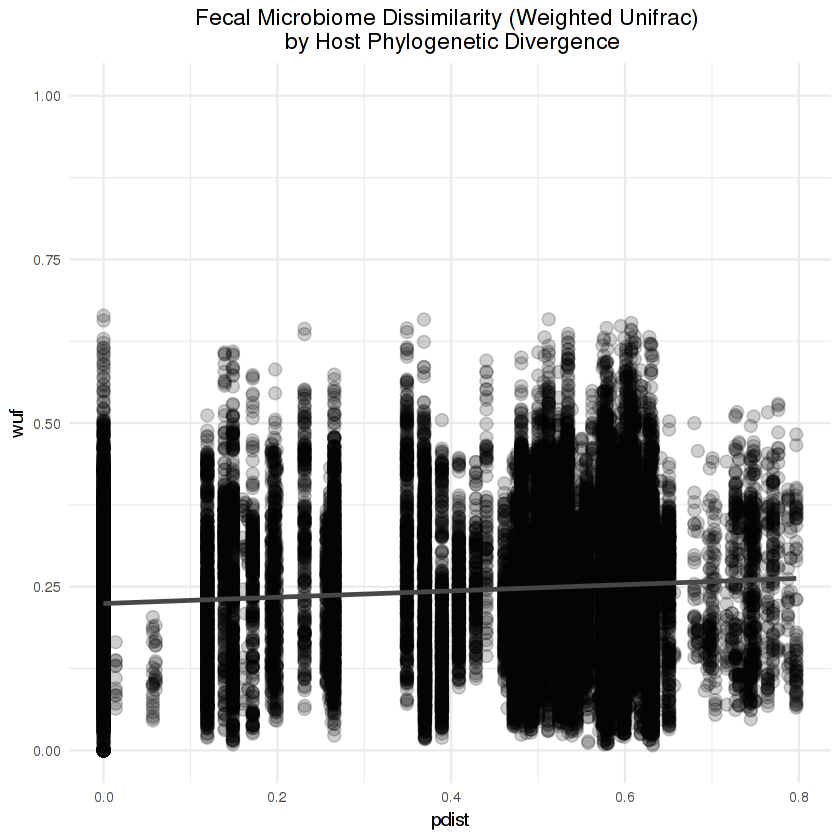

In [4]:
#Plot Host Phylogenetic divergence by microbial dissimilarity

p = ggplot(na.omit(fecal_wuf_mt), aes(x=pdist, y=wuf)) + 
    geom_point(alpha=0.1, size=3) +
    ggtitle("Fecal Microbiome Dissimilarity (Weighted Unifrac) \n by Host Phylogenetic Divergence")
p = p + geom_smooth(method = "lm", color = "grey28")#, se=TRUE, alpha=.2)
p = p + scale_y_continuous(limits=c(0,1))
p = p + theme_minimal() + theme(plot.title = element_text(hjust = 0.5)) 
p

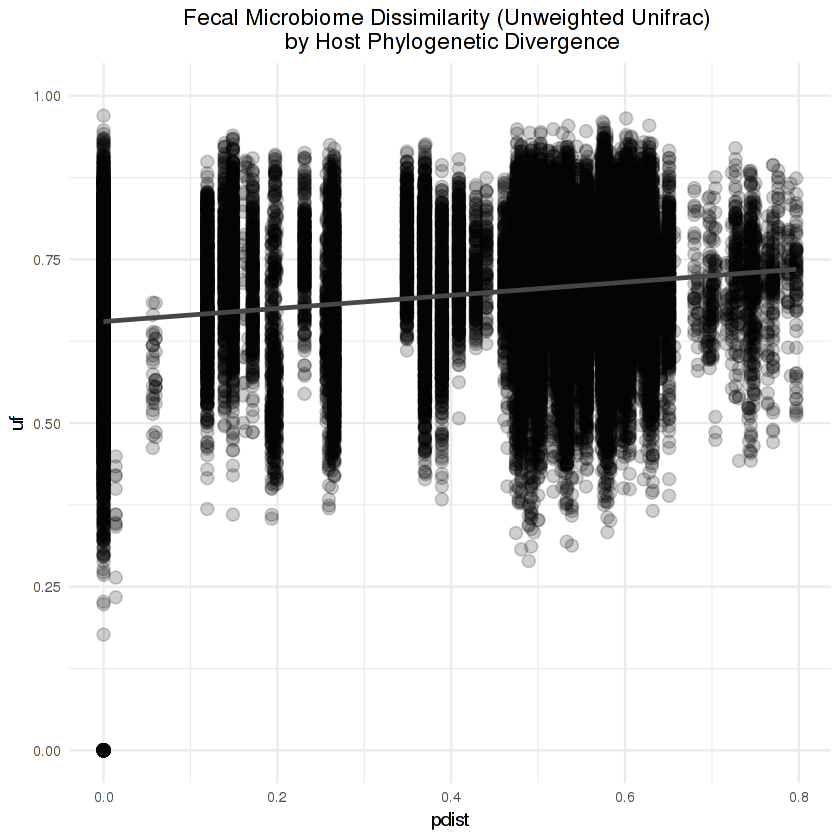

In [36]:
#Plot Host Phylogenetic divergence by microbial dissimilarity

p = ggplot(na.omit(fecal_uf_mt), aes(x=pdist, y=uf)) + 
    geom_point(alpha=0.1, size=3) + 
    ggtitle("Fecal Microbiome Dissimilarity (Unweighted Unifrac) \n by Host Phylogenetic Divergence")
p = p + geom_smooth(method = "lm", color="grey28")#, se=TRUE, alpha=.2)
p = p + scale_y_continuous(limits=c(0,1))
p = p + theme_minimal() + theme(plot.title = element_text(hjust = 0.5)) 
p

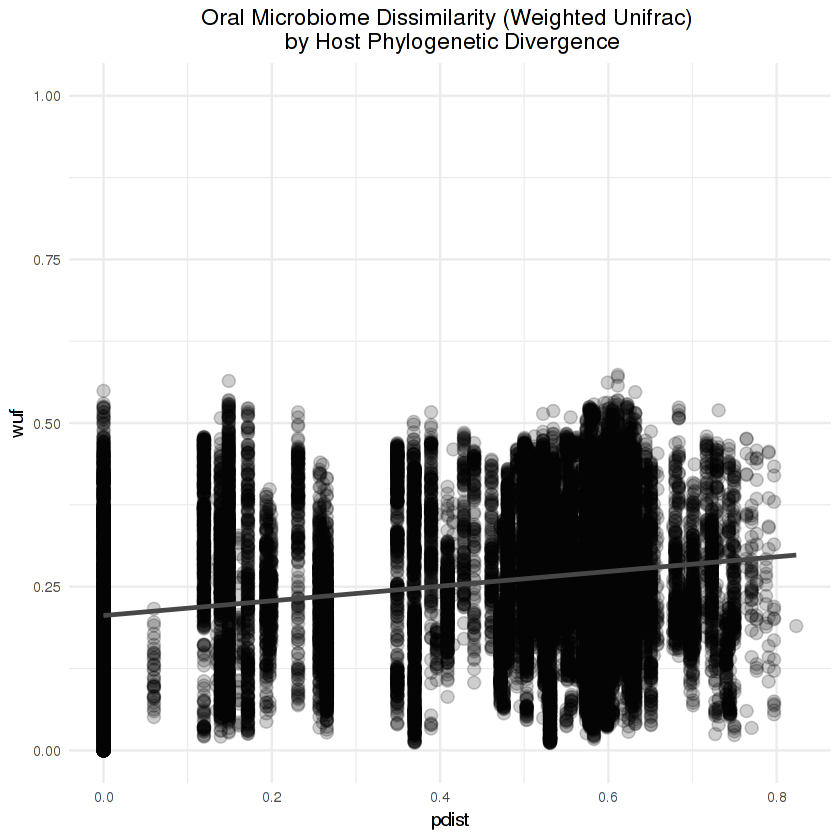

In [43]:
#Plot Host Phylogenetic divergence by microbial dissimilarity

p = ggplot(na.omit(oral_wuf_mt), aes(x=pdist, y=wuf)) + geom_point(alpha=0.1, size=3) + ggtitle("Oral Microbiome Dissimilarity (Weighted Unifrac) \n by Host Phylogenetic Divergence")
p = p + geom_smooth(method = "lm", color="grey28")#, se=TRUE, alpha=.2)
p = p + scale_y_continuous(limits=c(0,1))
p = p + theme_minimal() + theme(plot.title = element_text(hjust = 0.5)) 
p

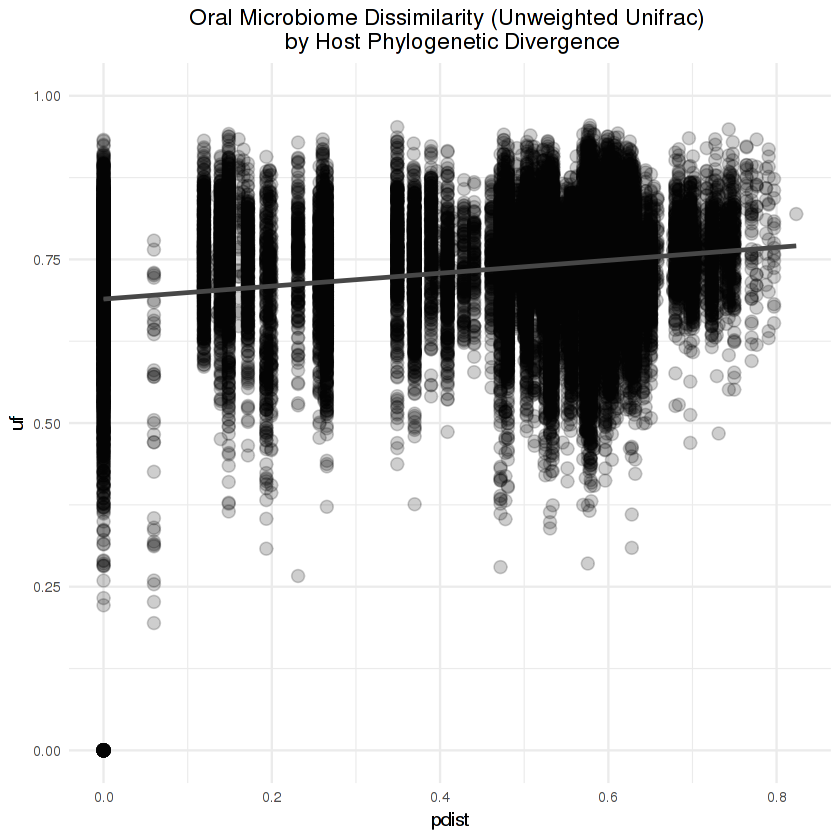

In [42]:
#Plot Host Phylogenetic divergence by microbial dissimilarity

p = ggplot(na.omit(oral_uf_mt), aes(x=pdist, y=uf)) + geom_point(alpha=0.1, size=3) + ggtitle("Oral Microbiome Dissimilarity (Unweighted Unifrac) \n by Host Phylogenetic Divergence")
p = p + geom_smooth(method = "lm", color="grey28")#, se=TRUE, alpha=.2)
p = p + scale_y_continuous(limits=c(0,1))
p = p + theme_minimal() + theme(plot.title = element_text(hjust = 0.5)) 
p

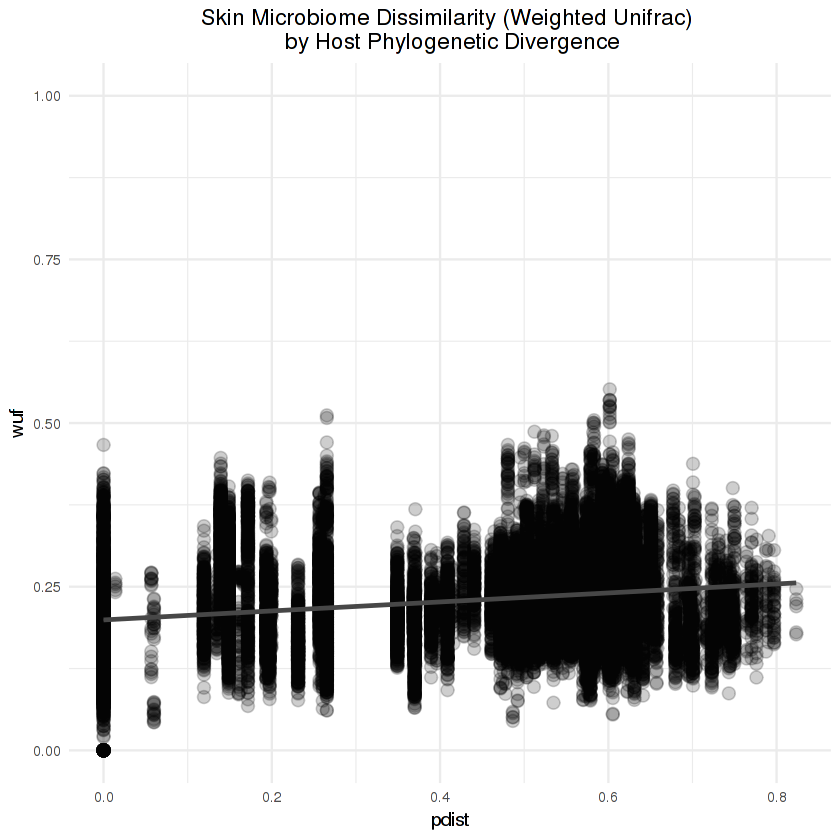

In [45]:
#Plot Host Phylogenetic divergence by microbial dissimilarity

p = ggplot(na.omit(skin_wuf_mt), aes(x=pdist, y=wuf)) + geom_point(alpha=0.1, size=3) + ggtitle("Skin Microbiome Dissimilarity (Weighted Unifrac) \n by Host Phylogenetic Divergence")
p = p + geom_smooth(method = "lm", color="grey28")#, se=TRUE, alpha=.2)
p = p + scale_y_continuous(limits=c(0,1))
p = p + theme_minimal() + theme(plot.title = element_text(hjust = 0.5)) 
p

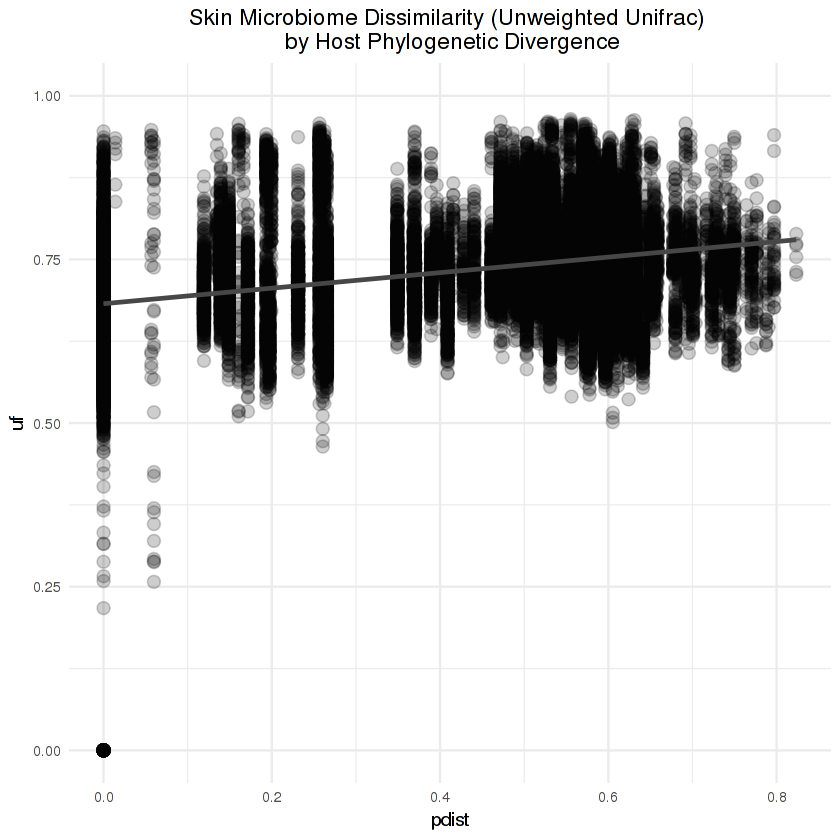

In [46]:
#Plot Host Phylogenetic divergence by microbial dissimilarity

p = ggplot(na.omit(skin_uf_mt), aes(x=pdist, y=uf)) + geom_point(alpha=0.1, size=3) + ggtitle("Skin Microbiome Dissimilarity (Unweighted Unifrac) \n by Host Phylogenetic Divergence")
p = p + geom_smooth(method = "lm", color="grey28")#, se=TRUE, alpha=.2)
p = p + scale_y_continuous(limits=c(0,1))
p = p + theme_minimal() + theme(plot.title = element_text(hjust = 0.5)) 
p